In [1]:
# Exercise 1: Data Preparation and Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Reading data into pandas dataframes

survey_df = pd.read_csv('DEMO_D.csv')
blood_df = pd.read_csv('BPX_D.csv')
chol_df = pd.read_csv('TCHOL_D.csv')

In [4]:
survey_df.shape, blood_df.shape, chol_df.shape

((10348, 11), (9950, 6), (8086, 3))

In [5]:
# Merging dataframes as per instructions
merged_df = survey_df.merge(blood_df, on='SEQN', how='inner').merge(chol_df, on='SEQN', how='inner')

In [6]:
# Checking for null values in RIDAGEYR column
merged_df.index[merged_df['RIDAGEYR'].isnull()]

Int64Index([], dtype='int64')

In [7]:
# Initializing AGE_AT_SCREENING and AGE_AT_EXAM columns
merged_df['AGE_AT_SCREENING'] = merged_df['RIDAGEMN']
merged_df['AGE_AT_EXAM'] = merged_df['RIDAGEEX']

In [8]:
# checking null indices for AGE_AT_SCREEING
merged_df.index[merged_df['AGE_AT_SCREENING'].isnull()]

Int64Index([   2,   18,  137,  172,  194,  252,  341,  384,  399,  427,
            ...
            7680, 7720, 7758, 7783, 7801, 7948, 7973, 8031, 8038, 8074],
           dtype='int64', length=148)

In [9]:
np.arange(merged_df.shape[0])[(merged_df['RIDAGEMN'] - (merged_df['RIDAGEYR'] * 12)).isnull()]

array([   2,   18,  137,  172,  194,  252,  341,  384,  399,  427,  721,
        744,  823,  927, 1016, 1021, 1028, 1137, 1190, 1240, 1267, 1338,
       1608, 1663, 1682, 1701, 1714, 1950, 1959, 1976, 2156, 2211, 2241,
       2252, 2255, 2331, 2518, 2534, 2599, 2653, 2777, 2837, 2843, 2897,
       2937, 2953, 3098, 3111, 3122, 3137, 3146, 3247, 3289, 3385, 3406,
       3415, 3427, 3457, 3473, 3477, 3498, 3513, 3530, 3548, 3655, 3700,
       3724, 3942, 3958, 3959, 4004, 4018, 4057, 4070, 4124, 4177, 4238,
       4274, 4291, 4332, 4339, 4369, 4371, 4413, 4450, 4519, 4531, 4543,
       4611, 4720, 4791, 4867, 4903, 4971, 4995, 5072, 5292, 5308, 5369,
       5403, 5489, 5548, 5569, 5588, 5629, 5720, 5752, 5868, 5870, 5940,
       5992, 5996, 6039, 6109, 6305, 6330, 6346, 6379, 6411, 6530, 6609,
       6628, 6796, 6848, 6853, 6868, 7034, 7061, 7116, 7243, 7345, 7391,
       7517, 7524, 7557, 7610, 7624, 7650, 7680, 7720, 7758, 7783, 7801,
       7948, 7973, 8031, 8038, 8074])

In [10]:
# From the available data, calculating the avg difference between the (age in yr * 12) and the (age in months) 
# to make estimates for new columns

avg_diff = (merged_df['RIDAGEMN'] - (merged_df['RIDAGEYR'] * 12)).sum()/merged_df.shape[0]
print (avg_diff)

5.28023744744002


In [11]:
# Updating the null values in AGE_AT_SCREENING using (age in yrs * 12) + avg_diff

null_indices = merged_df['AGE_AT_SCREENING'].isnull()
merged_df['AGE_AT_SCREENING'][null_indices] = (merged_df['RIDAGEYR'][null_indices] * 12) + int(avg_diff)

In [12]:
# Based on observations, updating the missing AGE_AT_EXAM values as AGE_AT_SCREENING + 1

null_indices = merged_df['RIDAGEEX'].isnull()
merged_df['AGE_AT_EXAM'][null_indices] = merged_df['AGE_AT_SCREENING'][null_indices] + 1

In [13]:
# Since all null values in RIDAGEMN are for people of age greater than 85 years of age, all the missing values
# come out to be (85*12) + 5 = 1026

merged_df['AGE_AT_EXAM'][null_indices]

2       1026.0
18      1026.0
137     1026.0
172     1026.0
194     1026.0
         ...  
7948    1026.0
7973    1026.0
8031    1026.0
8038    1026.0
8074    1026.0
Name: AGE_AT_EXAM, Length: 169, dtype: float64

In [14]:
# creating mapping from old categories to new categories
# New categories:
#           0: ELEMENTARY
#           1: HIGHSCHOOL
#           2: COLLEGE

education_level_map_6_19 = {**{x:0 for x in range(13)}, 13: 1, 14: 1, 15: 1, 55: 0, 66: 0, 77: 0, 99: 0}
education_level_map_20 = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2, 7: 0, 9: 0}

In [15]:
# Printing column for inspection
merged_df['DMDEDUC3']

0        4.0
1       10.0
2        NaN
3        NaN
4        NaN
        ... 
8081    15.0
8082     5.0
8083     NaN
8084     NaN
8085    11.0
Name: DMDEDUC3, Length: 8086, dtype: float64

In [16]:
# Converting the old categories to new categories into a single column

merged_df['HIGHEST_EDUCATION'] =\
            pd.concat([merged_df['DMDEDUC3'].apply(lambda x: education_level_map_6_19[x] if x in education_level_map_6_19 else None),
                        merged_df['DMDEDUC2'].apply(lambda x: education_level_map_20[x] if x in education_level_map_20 else None)], axis=1).max(axis=1)

# setting the default class for missing values to ELEMENTARY
merged_df['HIGHEST_EDUCATION'] = merged_df['HIGHEST_EDUCATION'].fillna(0.)

In [17]:
# checking if any missing values are remaining
np.arange(merged_df.shape[0])[merged_df['HIGHEST_EDUCATION'].isnull()]

array([], dtype=int64)

In [18]:
# Loading the retirement data
retire_df = pd.read_csv('DEMO_RETIRED.CSV')
retire_df.shape

(10348, 2)

In [19]:
# merging with existing dataframe
merged_df = merged_df.merge(retire_df, on='SEQN', how='left')

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Frequency'>

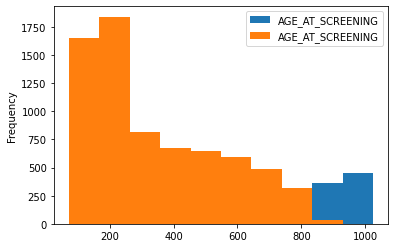

In [21]:
# Plotting histogram to find separation threshold for retirement

pd.concat([merged_df['AGE_AT_SCREENING'][merged_df['RETIRED']==1], merged_df['AGE_AT_SCREENING'][merged_df['RETIRED']==0]], axis=1).plot(kind='hist')

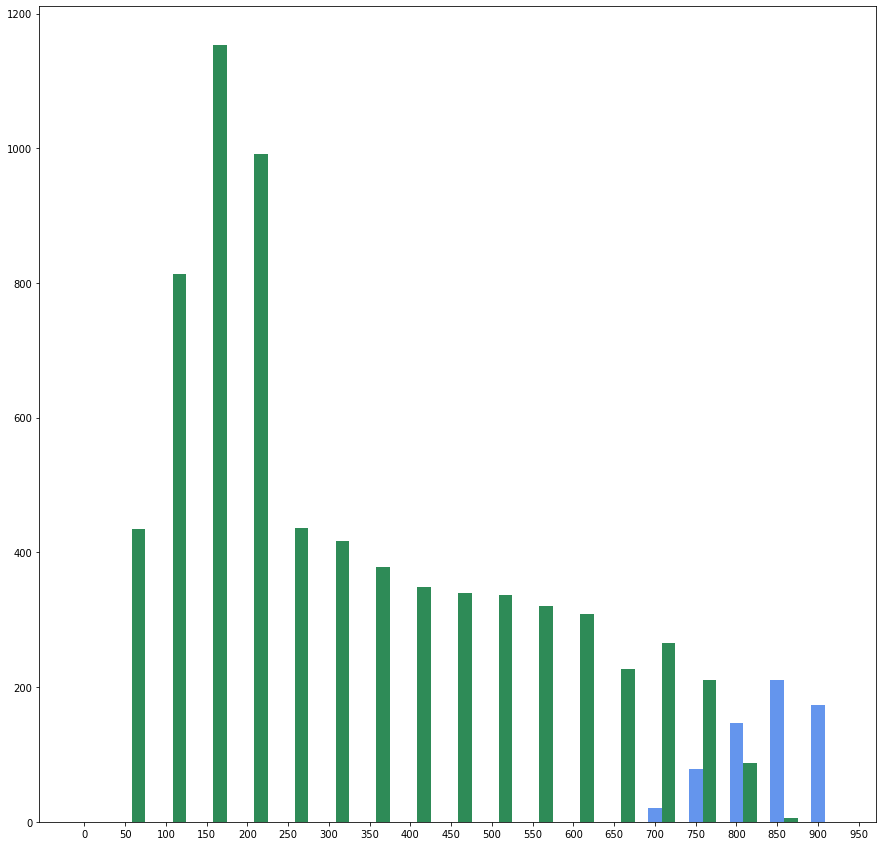

In [22]:
# Plotting a graph where the overlaps are solved
fig, ax = plt.subplots(figsize=(15,15))

heights, bins = np.histogram(merged_df['AGE_AT_SCREENING'], bins=range(0, 1000, 50))
retired_h, retired_bins = np.histogram(merged_df['AGE_AT_SCREENING'][merged_df['RETIRED']==1], bins=bins)
not_retired_h, not_retired_bins = np.histogram(merged_df['AGE_AT_SCREENING'][merged_df['RETIRED']==0], bins=bins)

width = (bins[1] - bins[0])/3

ax.bar(retired_bins[:-1], retired_h, width=width, facecolor='cornflowerblue')
ax.bar(not_retired_bins[:-1]+width, not_retired_h, width=width, facecolor='seagreen')
ax.set_xticks(range(0, 1000, 50))
#seaborn.despine(ax=ax, offset=10)

In [23]:
# Based on inpection 775 months looks like a sensible guess for retirement flag
# But on checking for missing retirement values in merged data, no filling of missing values is required
np.arange(merged_df.shape[0])[merged_df['RETIRED'].isnull()]

array([], dtype=int64)

In [24]:
# Exporting the prepared data
merged_df.to_csv('test.csv', index=False)

In [25]:
# Exercise 2: Model Builing

In [26]:
# Loading data

claim_df = pd.read_csv('claim_prediction.csv')
claim_df.head()

,EADDC,EAFXA,FDDBC,AFDDA,AXCXA,EXCCE,FBXFC,DFFEC,CEXAE,BBADX,CLAIM
0,-0.193513,0.021062,-0.870351,4.314903,-4.260162,-1.259531,0.175603,-0.942903,2.333260,4.678712,0
1,2.667844,-3.195978,2.718651,-0.885312,2.964261,2.161336,2.008505,-0.296360,-0.610780,-2.545978,1
2,2.280602,0.048539,-2.179863,-0.380866,-1.212960,2.097278,5.131315,-1.250050,2.362880,2.207307,0
3,0.592376,-1.590548,2.329976,-1.416489,1.743390,3.040990,2.371740,-0.190549,0.890761,-2.671923,0
4,1.236896,-0.656180,-0.381064,-2.332379,0.660684,2.055621,0.478162,-0.269513,2.614886,-3.655301,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [28]:
claim_df.shape

(10000, 11)

<AxesSubplot:ylabel='Frequency'>

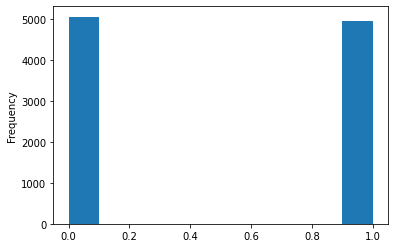

In [29]:
# Looking at class distribution just in case of imbalance

claim_df['CLAIM'].plot(kind='hist')

In [30]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(claim_df[['EADDC', 'EAFXA', 'FDDBC', 'AFDDA', 'AXCXA', 'EXCCE', 'FBXFC', 'DFFEC', 'CEXAE', 'BBADX']],
                                                    claim_df['CLAIM'], 
                                                    test_size=0.2)

In [31]:
X_train.shape

(8000, 10)

In [32]:
# Training a One vs Rest SVM Classifier and printing metrics (accuracy and confusion matrix)
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)

predicted = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print ("Confusion Matrix\n", metrics.confusion_matrix(y_test, predicted))

/opt/anaconda3/envs/text_processing/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.887
Confusion Matrix
 [[864 112]
 [114 910]]


In [33]:
# Training a MLP Classifier and printing metrics
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(32, 32), learning_rate='adaptive', max_iter=1000, early_stopping=True, n_iter_no_change=20, verbose=1)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print ("Confusion Matrix\n", metrics.confusion_matrix(y_test, predicted))

Iteration 1, loss = 0.56003527
Validation score: 0.838750
Iteration 2, loss = 0.43676217
Validation score: 0.860000
Iteration 3, loss = 0.41205256
Validation score: 0.875000
Iteration 4, loss = 0.39997446
Validation score: 0.875000
Iteration 5, loss = 0.39270083
Validation score: 0.885000
Iteration 6, loss = 0.38717948
Validation score: 0.888750
Iteration 7, loss = 0.38298167
Validation score: 0.888750
Iteration 8, loss = 0.37994596
Validation score: 0.886250
Iteration 9, loss = 0.37739779
Validation score: 0.891250
Iteration 10, loss = 0.37515007
Validation score: 0.891250
Iteration 11, loss = 0.37289333
Validation score: 0.892500
Iteration 12, loss = 0.37123505
Validation score: 0.890000
Iteration 13, loss = 0.36999458
Validation score: 0.891250
Iteration 14, loss = 0.36722214
Validation score: 0.891250
Iteration 15, loss = 0.36607661
Validation score: 0.892500
Iteration 16, loss = 0.36546207
Validation score: 0.888750
Iteration 17, loss = 0.36253209
Validation score: 0.892500
Iterat

In [34]:
# Training a One vs One SVM Classifier and printing metrics
clf1 = SVC(class_weight='balanced')
clf1.fit(X_train, y_train)

predicted = clf1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print ("Confusion Matrix\n", metrics.confusion_matrix(y_test, predicted))

/opt/anaconda3/envs/text_processing/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.887
Confusion Matrix
 [[864 112]
 [114 910]]


In [35]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [36]:
# Training a Gradient Boosting Classifier and printing metrics

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print ("Confusion Matrix\n", metrics.confusion_matrix(y_test, predicted))

Accuracy: 0.861
Confusion Matrix
 [[849 127]
 [151 873]]


In [37]:
# Training a Random Forest Classifier and printing metrics

clf5 = RandomForestClassifier().fit(X_train, y_train)

predicted = clf5.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print ("Confusion Matrix\n", metrics.confusion_matrix(y_test, predicted))

/opt/anaconda3/envs/text_processing/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.852
Confusion Matrix
 [[851 125]
 [171 853]]


In [38]:
# Since the data was very clean and the classes were balanced, I did not use keras/tensorflow to build the models 
# as sklearn provides clean out of teh box implementaions for experimentation. I found in my experiments that the test 
# scores were same on one vs rest and one vs one SVM classifiers.

In [39]:
'''
Exercise 3: Model Evaluation

Question 1
Response:
To determine the number of clusters in k-means clustering one of the popular methods is using the elbow curve. What this
means is that we plot the avg distance of each point from its cluster center for difference number of clusters. While plotting
this curve, we notice a sudden change in slope for the decrease in distances for every increse in number of clusters. We can use
this number as the number of clusters. Although, this is just a convention and the ideal number of clusters can depend on a
variety of other factors.

We can check the quality of k-means clustering by using silhouette analysis. In this you try to compute for each data point how
closely it relates to its own cluster rather than a neioghbouring cluster. A good silhouette plot means that the clusters are
properly separated and have distinct properties from each other.

Question 2
Response:
Low bias and high variance might be a case of existing dependence or correlation between the input features of the data. We
can deal with this by using dimensionality reduction and training the linear regression model on the transformed data. 

Moreover, we can also try to increase the regularisation factors of the regression model so that weights are more contrained
in order to reduce variance.

Question 3
Response:


Question4
Response:
Part a:
Recall = TP/(TP + FN)
Precision = TP/(TP + FP)
F1 score = harmonic mean of precision and recall

recall = 112/(112 + 6) = 0.9491
precision = 112/(112 + 48) = 0.7
F1 score = (2 * p * r) / (p + r) = 0.8057


Part b:
For the case of cancer prediction, we want to minimise the false negatives as we definitely do want to alert the people who
actually have camcer. For this case the metric that we will use is recall and the error we would focus on would be type 2 error.

Part c:
For this case I want to be able to find all the right recommendations but can compromise on giving certain wrong recommendations
as well since the user can simply ignore them. In this case, we need to again maximise True Positives and minimise missing the
right recommendations or minimise the false negatives. So even in this case we would use the type 2 error.
'''


'\nExercise 3: Model Evaluation\n\nQuestion 1\nResponse:\nTo determine the number of clusters in k-means clustering one of the popular methods is using the elbow curve. What this\nmeans is that we plot the avg distance of each point from its cluster center for difference number of clusters. While plotting\nthis curve, we notice a sudden change in slope for the decrease in distances for every increse in number of clusters. We can use\nthis number as the number of clusters. Although, this is just a convention and the ideal number of clusters can depend on a\nvariety of other factors.\n\nWe can check the quality of k-means clustering by using silhouette analysis. In this you try to compute for each data point how\nclosely it relates to its own cluster rather than a neioghbouring cluster. A good silhouette plot means that the clusters are\nproperly separated and have distinct properties from each other.\n\nQuestion 2\nResponse:\nLow bias and high variance might be a case of existing depend

In [40]:
# Exercise 4: Anomaly Detection

In [41]:
# reading data
anomaly_df = pd.read_csv('anomaly_detection_dates.csv')
anomaly_df['DATE'] = pd.to_datetime(anomaly_df['DATE'])
anomaly_df.head()

,DATE,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
0,2016-01-01,0.000000,0.000000,3.000000,3.000000,8.000000
1,2016-02-01,1.232260,-0.217305,3.193780,3.489992,7.792553
2,2016-03-01,2.540129,0.606709,3.180950,3.464811,7.817440
3,2016-04-01,5.520271,1.470812,3.330528,2.968375,7.409152
4,2016-05-01,5.914298,2.745060,3.061706,3.440980,7.153049


In [42]:
from sklearn.decomposition import PCA

In [43]:
# fitting a pca model on the data
pca = PCA()
pca.fit(anomaly_df[['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
# Looking at variance distribution along different components
pca.explained_variance_

array([30.09395304,  4.54227171,  1.52110246,  1.31939925,  0.40122541])

In [45]:
# Obtaining transformed data
X_transformed = pca.transform(anomaly_df[['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB']])

In [46]:
X_transformed.shape

(365, 5)

In [47]:
# Fitting a single gaussian distribution on the new components
# The gaussian is fit on the transformed data since the gaussian dostribution is only able to measure the mean and
# variance along the dimensions of data. So using the directions that capture variance in the data in a better way 
# will create a better fitting gaussian distribution
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture()

# gmm.fit(X_transformed)
gmm.fit(X_transformed[~anomaly_df['DATE'].isin(pd.date_range(pd.Timestamp(2016,2,14), pd.Timestamp(2016,2,21), freq='1D'))])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [48]:
gmm.score_samples(X_transformed[anomaly_df['DATE']==pd.Timestamp(2016,1,1)])

array([-10.39181753])

In [49]:
anomaly_df[anomaly_df['DATE']==pd.Timestamp(2016,1,30)]

,DATE,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
29,2016-01-30,6.045535,2.805374,0.999693,3.159062,8.427402


In [50]:
# Looking at the values for the data that the analyst has labelled anomalous

gmm.score_samples(X_transformed[anomaly_df['DATE'].isin(pd.date_range(pd.Timestamp(2016,2,14), pd.Timestamp(2016,2,21), freq='1D'))])

array([-11.99588804, -13.15484824,  -9.38480145, -11.42256434,
       -12.94388762,  -9.2925613 , -11.02183352, -11.00720977])

In [51]:
# Average log-likelihood of the data
gmm.score(X_transformed)

-9.443933911521242

In [52]:
# Calculating the probability for each sample in the data
probs = gmm.score_samples(X_transformed)

In [53]:
# Having a look at the days that are returned if we decide on a probility threshold of 10.5
list(zip(np.argwhere(-probs>10.5), probs[-probs>10.5]))

[(array([1]), -10.597399251833064),
 (array([44]), -11.99588804068432),
 (array([45]), -13.154848236327032),
 (array([47]), -11.422564341015294),
 (array([48]), -12.943887616674806),
 (array([50]), -11.021833518804408),
 (array([51]), -11.007209770443788),
 (array([52]), -12.606524604681995),
 (array([53]), -11.145595303018984),
 (array([56]), -10.614614606249784),
 (array([65]), -10.512234064713715),
 (array([66]), -10.68721572821118),
 (array([117]), -11.3585314342297),
 (array([118]), -11.115956236482601),
 (array([126]), -10.570776427113113),
 (array([152]), -10.515917701094919),
 (array([270]), -10.840657303090993),
 (array([291]), -10.798029030012737),
 (array([292]), -10.809715760030548),
 (array([293]), -11.346250638703605),
 (array([296]), -10.933226404383609),
 (array([299]), -10.802127988327095),
 (array([318]), -15.925895857445319),
 (array([319]), -14.621302802171199),
 (array([320]), -15.81138376690645),
 (array([321]), -20.07364318587062),
 (array([322]), -17.19532225670

In [54]:
probs

array([-10.39181753, -10.59739925,  -9.87247989,  -9.92616214,
        -9.31401618,  -9.40372786,  -9.3285147 ,  -9.87208832,
        -9.37383162,  -9.09176818,  -8.94006613,  -8.82520043,
        -8.94866629,  -9.13373005,  -8.94318274,  -9.17048995,
        -9.30787478,  -8.93821037,  -8.3453876 ,  -8.60784125,
        -8.2574543 ,  -8.36621261,  -8.23085255,  -8.66468002,
        -8.7438937 ,  -9.48897633,  -9.01132069,  -8.43617306,
        -8.63069884,  -7.79115971,  -7.85908375,  -8.17741097,
        -8.06066436,  -8.22315176,  -8.4546567 ,  -8.64430006,
        -8.62911078,  -8.86418454,  -9.00383484,  -8.91833749,
        -8.60497354,  -8.86396214,  -8.72447158,  -9.05944019,
       -11.99588804, -13.15484824,  -9.38480145, -11.42256434,
       -12.94388762,  -9.2925613 , -11.02183352, -11.00720977,
       -12.6065246 , -11.1455953 , -10.11381741, -10.17262237,
       -10.61461461,  -9.58257959,  -9.52707202, -10.13856278,
        -9.59656294, -10.26655076,  -9.06963555,  -8.85

In [55]:
anomaly_df[anomaly_df['DATE'].isin(pd.date_range(pd.Timestamp(2016,2,14), pd.Timestamp(2016,2,21), freq='1D'))]

,DATE,CEACC,CCDEF,FAXAE,FBFFD,EDDAB
44,2016-02-14,4.043725,-1.219565,0.905195,2.288989,7.709211
45,2016-02-15,4.576282,-1.492071,0.899782,2.130575,7.968487
46,2016-02-16,2.210294,-0.576621,-0.044090,3.037759,7.975463
47,2016-02-17,2.482837,-1.658767,-0.550546,4.215023,7.828515
48,2016-02-18,4.480263,-1.545013,-0.934196,2.485914,8.099992
49,2016-02-19,1.943677,-0.539503,-1.623672,3.877839,8.551997
50,2016-02-20,2.586666,-1.487198,-2.121800,3.344881,8.535509
51,2016-02-21,2.934930,1.413589,-2.289341,2.777793,8.198616


In [56]:
# function to detect anomalous readings based on the description in the problem

def detect_anomaly(anomaly_df):
    pca = PCA()
    pca.fit(anomaly_df[['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB']])
    X_transformed = pca.transform(anomaly_df[['CEACC', 'CCDEF', 'FAXAE', 'FBFFD', 'EDDAB']])
    gmm = GaussianMixture()
    gmm.fit(X_transformed)
    probs = gmm.score_samples(X_transformed)
    indices = np.where(-probs > 10.5)[0]
    tolerance = 2
    anomalous_ind = []
    start_i = -2
    prev_i = -tolerance - 1
    # print (probs)
    # print (indices)
    for i in indices:
        if i - prev_i <= 1 and start_i < 0:
            start_i = prev_i
        elif start_i >= 0 and i - prev_i > tolerance:
            if prev_i - start_i < 14:
                anomalous_ind.append(list(range(start_i, prev_i + 1)))
            start_i = -2
        prev_i = i
    if start_i >= 0:
        if prev_i - start_i < 14:
            anomalous_ind.extend(list(range(start_i, indices[-1] + 1)))
        # print (prev_i, start_i)
    dates = [list(anomaly_df['DATE'][ind]) for ind in anomalous_ind]
    # print (dates)
    return dates

        
    

In [57]:
# Printing out the dates with detected anomalies
 
detect_anomaly(anomaly_df)

# we observe based on these results we observe 3 anomalous periods between 10/01/2016 to 12/30/2016

[[Timestamp('2016-02-14 00:00:00'),
  Timestamp('2016-02-15 00:00:00'),
  Timestamp('2016-02-16 00:00:00'),
  Timestamp('2016-02-17 00:00:00'),
  Timestamp('2016-02-18 00:00:00'),
  Timestamp('2016-02-19 00:00:00'),
  Timestamp('2016-02-20 00:00:00'),
  Timestamp('2016-02-21 00:00:00'),
  Timestamp('2016-02-22 00:00:00'),
  Timestamp('2016-02-23 00:00:00')],
 [Timestamp('2016-04-27 00:00:00'), Timestamp('2016-04-28 00:00:00')],
 [Timestamp('2016-10-18 00:00:00'),
  Timestamp('2016-10-19 00:00:00'),
  Timestamp('2016-10-20 00:00:00')],
 [Timestamp('2016-11-14 00:00:00'),
  Timestamp('2016-11-15 00:00:00'),
  Timestamp('2016-11-16 00:00:00'),
  Timestamp('2016-11-17 00:00:00'),
  Timestamp('2016-11-18 00:00:00'),
  Timestamp('2016-11-19 00:00:00'),
  Timestamp('2016-11-20 00:00:00')],
 [Timestamp('2016-09-12 00:00:00'), Timestamp('2016-10-12 00:00:00')]]